In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

### Preprocesamiento de los datos

#### Consigna 1

Leer los datos del archivo `tabla_nutricional.csv`. Completar las celdas faltantes con ceros y asegurarse de que todos los datos estén en la misma unidad.


In [6]:
def iniciar_tabla():
    tabla_nutricional = pd.read_csv('tabla_nutricional.csv', sep=';')
    tabla_nutricional.fillna(0, inplace=True) #Reemplazamos los nulls por 0s

    cols = tabla_nutricional.columns
    tabla_nutricional['Na (gr)'] = tabla_nutricional['Na (mg)']/1000 #Convertimos todo a gramos
    tabla_nutricional['Ca (gr)'] = tabla_nutricional['Ca (mg)']/1000 
    tabla_nutricional['Fe (gr)'] = tabla_nutricional['Fe (mg)']/1000
    cols_to_drop = [col for col in cols if 'mg' in col]
    tabla_nutricional.drop(cols_to_drop, axis=1, inplace=True)
    return tabla_nutricional
tabla_nutricional = iniciar_tabla()
tabla_nutricional.head(57)

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr)
0,Leche fluida entera,270.00,12.420,8.370,7.830,0.00,4.990,2.190,0.520,0.00,0.153900,0.28350,0.000189
1,Leche entera en polvo,11.00,4.510,2.840,2.730,0.00,1.620,0.770,0.060,0.00,0.044440,0.09900,0.000060
2,Yogurt,19.00,2.450,0.510,0.490,0.00,0.320,0.140,0.014,0.00,0.007990,0.01767,0.000005
3,Queso crema,1.66,0.060,0.100,0.370,0.00,0.360,0.110,0.010,0.00,0.001230,0.00093,0.000000
4,Queso cuartirolo,3.66,0.060,0.770,0.800,0.00,0.760,0.210,0.020,0.00,0.020840,0.01654,0.000000
5,Queso rallar,1.66,0.060,0.550,0.450,0.00,0.360,0.110,0.008,0.00,0.020420,0.01578,0.000000
6,Huevo,16.00,0.000,1.920,1.890,0.00,0.510,0.720,0.460,0.00,0.021600,0.00896,0.000400
7,Asado,50.00,0.000,9.300,7.500,0.00,2.930,3.270,0.189,0.00,0.033000,0.00750,0.001120
8,Paleta,15.00,0.000,3.000,1.500,0.00,0.880,0.980,0.056,0.00,0.009900,0.00180,0.000340
9,Hueso c/carne,15.00,0.000,3.000,1.500,0.00,0.880,0.980,0.056,0.00,0.009900,0.00180,0.000340


# Consigna 2

Desarrollar una función que reciba como parámetro un DataFrame y que evalúe si las cantidades de los principales elementos de la dieta (proteínas, carbohidratos, grasas, sodio, fibra, frutas y verduras) cumplen los márgenes de ingesta de la OMS. Esta función debe devolver VERDADERO si los cumple.


In [4]:
def eval_oms(a: pd.DataFrame):
    hidratosDeCarbono = a['HC (gr)'].sum()
    proteinas = a['Proteinas (gr)'].sum()
    grasas = a['Grasas (gr)'].sum()
    azucaresL = a['Azucares Libres (gr)'].sum()
    ags = a['AGS (gr)'].sum()
    agni = a['AGNI (gr)'].sum()
    agP = a['AG p (gr)'].sum()
    fibra = a['Fibra (gr)'].sum()
    sodio = a['Na (gr)'].sum()
    calcio = a['Ca (gr)'].sum()
    hierro = a['Fe (gr)'].sum()
    cantidad = (hidratosDeCarbono + proteinas + grasas + azucaresL + fibra + sodio + calcio + hierro)
    
    hidratosDeCarbonoP = (hidratosDeCarbono / cantidad) * 100
    proteinasP = (proteinas / cantidad) * 100
    grasasP = (grasas / cantidad) * 100
    azucaresLP = (azucaresL / cantidad) * 100
    agsP = (ags / cantidad) * 100
    sodiomg = sodio * 1000 - 2000  # Restamos los 2000 miligramos de la sal fina

    lista_fru_ver = ['Acelga', 'Banana', 'Batata', 'Cebolla', 'Mandarina', 'Lechuga', 'Manzana', 'Naranja', 'Papa', 'Pera', 'Tomate', 'Zanahoria', 'Zapallo']
    cantidadFV = a[a['Alimento'].isin(lista_fru_ver)]['Cantidad (gr/ml)'].sum()

    resultados = {
        "Hidratos de carbono": hidratosDeCarbonoP,
        "Proteinas": proteinasP,
        "Grasas": grasasP,
        "Azucares Libres": azucaresLP,
        "AGS": agsP,
        "Fibra": fibra,
        "Sodio": sodiomg,
        "Frutas y Verduras": cantidadFV
    }

    margenes = {
        "Hidratos de carbono": (55, 75),
        "Proteinas": (10, 15),
        "Grasas": (15, 30),
        "Azucares Libres": (0, 10),
        "AGS": (0, 10),
        "Fibra": (25, float('inf')),
        "Sodio": (0, 2000),
        "Frutas y Verduras": (400, float('inf'))
    }

    desviaciones = {}
    for key, value in resultados.items():
        min_margen, max_margen = margenes[key]
        if key == "Fibra" or key == "Frutas y Verduras":
            if value < min_margen:
                desviaciones[key] = min_margen - value
            else:
                desviaciones[key] = 0
        elif key == "Sodio":
            if value > max_margen:
                desviaciones[key] = value - max_margen
            else:
                desviaciones[key] = 0
        else:
            if value < min_margen:
                desviaciones[key] = min_margen - value
            elif value > max_margen:
                desviaciones[key] = value - max_margen
            else:
                desviaciones[key] = 0

    cumplimiento = {
        "Hidratos de carbono": 55 < hidratosDeCarbonoP < 75,
        "Proteinas": 10 < proteinasP < 15,
        "Grasas": 15 < grasasP < 30,
        "Azucares Libres": azucaresLP < 10,
        "AGS": agsP < 10,
        "Fibra": fibra > 25,
        "Sodio": sodiomg < 2000,
        "Frutas y Verduras": cantidadFV >= 400
    }

    print("Resultados:", resultados)
    print("Cumplimiento:", cumplimiento)
    print("Desviaciones:", desviaciones)

    return cumplimiento, desviaciones

# Uso de la función
cumplimiento, desviaciones = eval_oms(tabla_nutricional)


Resultados: {'Hidratos de carbono': 60.18272168796659, 'Proteinas': 16.491328855678784, 'Grasas': 11.28307752323229, 'Azucares Libres': 8.32539753017686, 'AGS': 3.840978997975164, 'Fibra': 21.26, 'Sodio': 1337.714, 'Frutas y Verduras': 634.0}
Cumplimiento: {'Hidratos de carbono': True, 'Proteinas': False, 'Grasas': False, 'Azucares Libres': True, 'AGS': True, 'Fibra': False, 'Sodio': True, 'Frutas y Verduras': True}
Desviaciones: {'Hidratos de carbono': 0, 'Proteinas': 1.491328855678784, 'Grasas': 3.71692247676771, 'Azucares Libres': 0, 'AGS': 0, 'Fibra': 3.7399999999999984, 'Sodio': 0, 'Frutas y Verduras': 0}


## Análisis en Componentes Principales

### Consigna 3

Realizar un Análisis en Componentes Principales (ACP), tomando el valor nutricional de cada alimento por gramo. Graficar cada alimento como un punto en ejes coordenados del nuevo espacio creado por los autovectores generadores del ACP. En este gráfico, analizar los clusters que quedan planteados por la proyección.

In [18]:
def normalizar_tabla(df):
    df_normalizado = df.copy()
    for i, row in df.iterrows():
        cantidad = row['Cantidad (gr/ml)']
        df_normalizado.iloc[i, 1:] = row.iloc[1:] / cantidad
    return df_normalizado
def calculoACP_por_fila(df: pd.DataFrame):
    # Normalizar las columnas dividiendo por la cantidad
    df_normalizado = normalizar_tabla(df)
    # Eliminar la columna de cantidad
    df_normalizado = df_normalizado.drop('Cantidad (gr/ml)', axis='columns')
    
    nombres = df_normalizado.iloc[:, 0].values  # Extraer los nombres
    datos = df_normalizado.iloc[:, 1:].values   # Extraer los datos numéricos
    
    # Centrar los datos por filas
    datos_centrados = datos - np.mean(datos, axis=1, keepdims=True)
    
    # Calcular la matriz de covarianza de los datos centrados transpuestos
    Mcov = np.cov(datos_centrados.T)
    
    # Calcular los valores y vectores propios
    D, V = np.linalg.eigh(Mcov)
    
    # Ordenar los valores y vectores propios en orden descendente
    idx = np.argsort(-D)
    D = D[idx]
    V = V[:, idx]
    
    # Calcular la varianza explicada
    varianza_explicada = D / np.sum(D)
    
    return D, V, datos_centrados, varianza_explicada, nombres

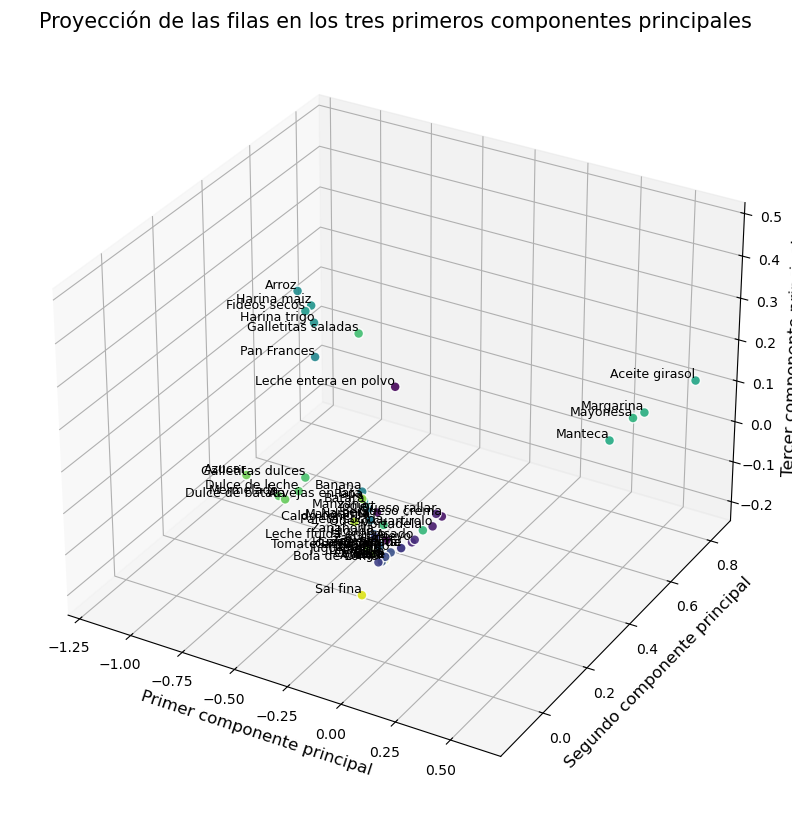

In [19]:
def graficar_componentes_principales_3d(df: pd.DataFrame, nombres_productos: list = None):
    D, V, datos_centrados, varianza_explicada, nombres = calculoACP_por_fila(df)
    
    # Proyectar los datos centrados en los tres primeros componentes principales
    proyecciones = np.dot(datos_centrados, V[:, :3])
    
    if nombres_productos is not None:
        # Filtrar las proyecciones para incluir solo los nombres en la lista
        mask = np.isin(nombres, nombres_productos)
        proyecciones = proyecciones[mask]
        nombres = nombres[mask]
    
    # Crear el gráfico 3D
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d', facecolor='white')
    
    # Crear un mapa de colores
    colors = plt.cm.viridis(np.linspace(0, 1, len(nombres)))
    
    ax.scatter(proyecciones[:, 0], proyecciones[:, 1], proyecciones[:, 2], c=colors, s=50, edgecolors='w', alpha=0.9)
    
    for i, nombre in enumerate(nombres):
        ax.text(proyecciones[i, 0], proyecciones[i, 1], proyecciones[i, 2], nombre, fontsize=9, ha='right', va='bottom')
    
    ax.set_title('Proyección de las filas en los tres primeros componentes principales', fontsize=15)
    ax.set_xlabel('Primer componente principal', fontsize=12)
    ax.set_ylabel('Segundo componente principal', fontsize=12)
    ax.set_zlabel('Tercer componente principal', fontsize=12)
    
    # Mejorar la visibilidad de la cuadrícula
    ax.grid(True, linestyle='--', linewidth=0.5)
    
    plt.show()

# Uso de la función para todos los productos
graficar_componentes_principales_3d(tabla_nutricional)

cambiar

En este primer gráfico, se pueden observar claramente 4 grupos de alimentos:

Los elementos que están en verde a la izquierda son todos dulces sólidos. Estos alimentos tienen alto contenido en azúcar.

A la derecha, se encuentran los alimentos con el más alto contenido en grasa: manteca, margarina, aceite y mayonesa. El ACP logra distinguirlos claramente del resto.

Arriba, están los alimentos con alto contenido de hidratos de carbono, cuyo componente en compun más notorio es la harina.

En el centro, se encuentra el grupo más grande.

# Consigna 4
Proyectar los alimentos de la tabla de Consumidores libres en el
espacio de generadores del ACP.

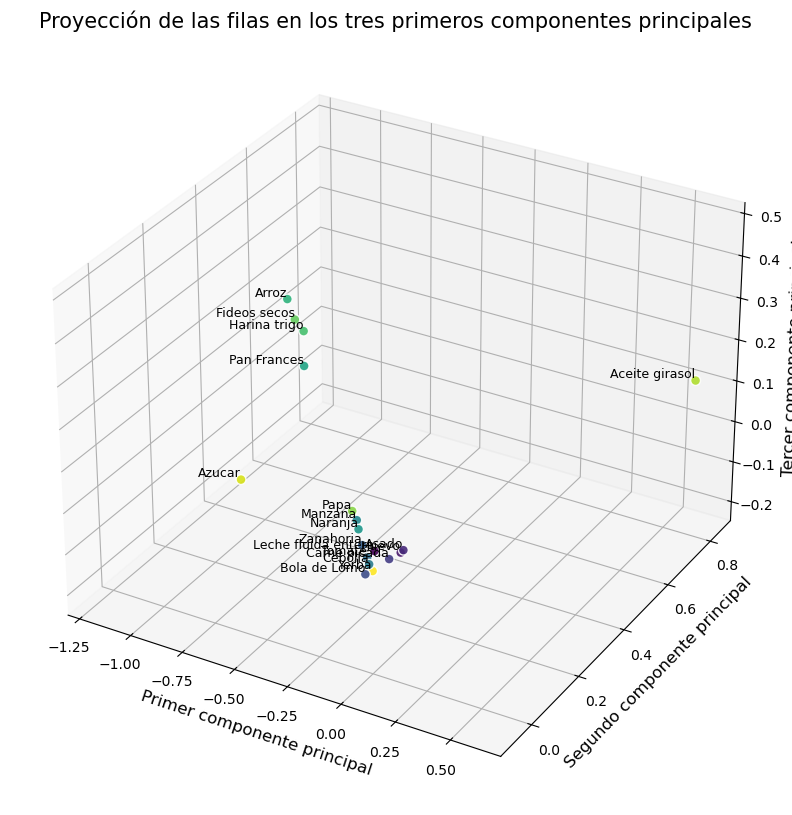

In [7]:
#Filtramos solo los productos que están en ambas tablas, a la mayoria les cambiamos el nombre porque interpretamos que refieren a lo mismo:
nombres_productos=['Aceite girasol', 'Arroz', 'Asado', 'Azucar', 'Bola de Lomo', 'Carne picada', 'Cebolla', 'Fideos secos', 'Harina trigo', 'Huevo', 'Leche fluida entera', 'Manzana', 'Naranja', 'Paleta', 'Pan Frances', 'Papa', 'Tomate', 'Yerba', 'Zanahoria']
graficar_componentes_principales_3d(tabla_nutricional, nombres_productos)

# Consigna 5

Aplicar Mínimos Cuadrados sobre los precios de cada nutriente (HC, Proteínas y grasas) para evaluar el aumento en estos 4 meses. Graficar cada punto de cada alimento y la recta obtenida por Mínimos Cuadrados. Hacer una tabla de los aumentos.


In [8]:
# Leer los datos
tabla_consumidores_libres = pd.read_csv('consumidores_libres.csv', sep=';')
tabla_nutricional = pd.read_csv('tabla_nutricional.csv', sep=';')

# Diccionario de valores a reemplazar
reemplazos = {
    'ACEITE COCINERO GIRASOL': 'Aceite girasol',
    'ARROZ GRANO FINO': 'Arroz',
    'AZUCAR LEDESMA': 'Azucar',
    'FIDEOS GUISEROS': 'Fideos secos',
    'HUEVOS COLOR DOCENA': 'Huevo',
    'HARINA DE TRIGO': 'Harina trigo',
    'PAN FRESCO': 'Pan Frances',
    'LECHE c/VIT.FORT': 'Leche fluida entera',
    'YERBA TARAGUI': 'Yerba',
    'ZANAHORIAS': 'Zanahoria',
    'TOMATE PERITA': 'Tomate',
    'CEBOLLA': 'Cebolla',
    'PAPA NEGRA': 'Papa',
    'NARANJA': 'Naranja',
    'MANZANA': 'Manzana',
    'BOLA DE LOMO': 'Bola de Lomo',
    'ASADO': 'Asado',
    'PALETA': 'Paleta',
    'CARNE PICADA COMUN': 'Carne picada'
}

# Reemplazar los valores en la columna correspondiente
tabla_consumidores_libres.iloc[:, 0] = tabla_consumidores_libres.iloc[:, 0].replace(reemplazos)

# Encontrar los alimentos comunes
alimentos_comunes = set(tabla_nutricional['Alimento']).intersection(set(tabla_consumidores_libres['PRODUCTOS']))
print(alimentos_comunes)




{'Azucar', 'Harina trigo', 'Asado', 'Manzana', 'Tomate', 'Yerba', 'Papa', 'Arroz', 'Cebolla', 'Carne picada', 'Leche fluida entera', 'Naranja', 'Aceite girasol', 'Zanahoria', 'Huevo', 'Bola de Lomo', 'Fideos secos', 'Pan Frances'}


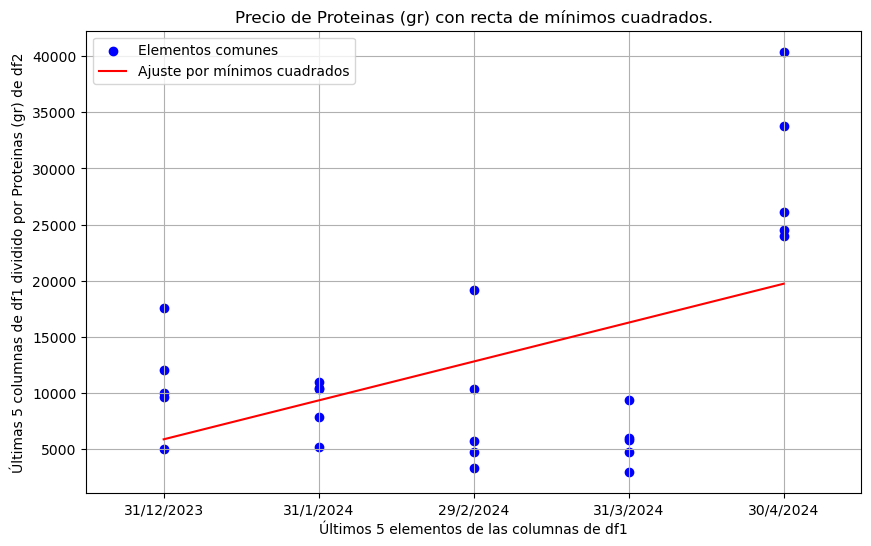

Fórmula de la recta para Proteinas (gr): y = 3465.10x + 5875.04


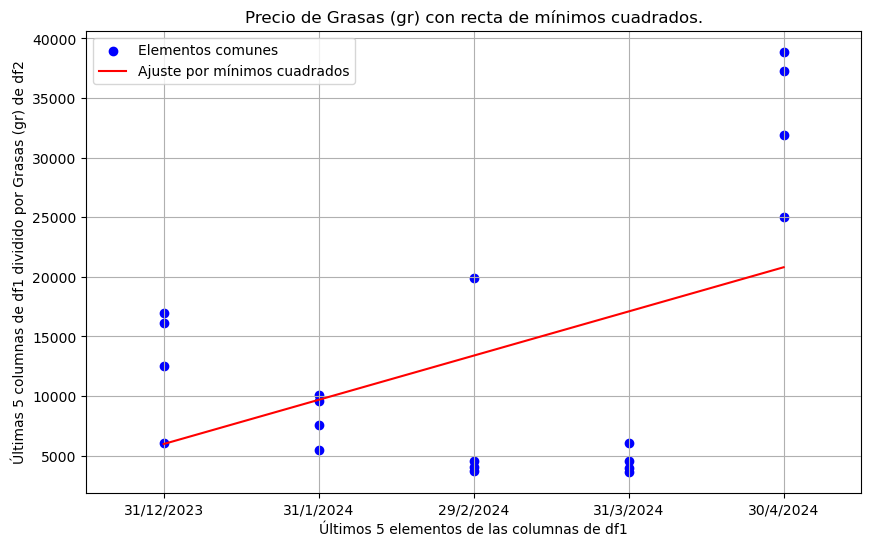

Fórmula de la recta para Grasas (gr): y = 3707.63x + 5975.99


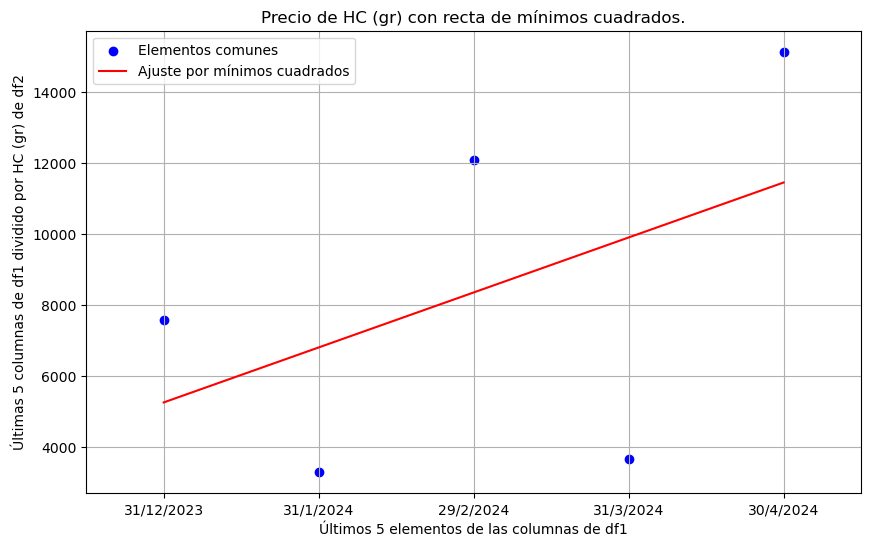

Fórmula de la recta para HC (gr): y = 1548.78x + 5243.90


In [20]:

def graficar_minimos_cuadrados(df1, df2, column_to_divide):
    # Normalizar tabla nutricional
    df2_normalizado = normalizar_tabla(df2)
    
    # Seleccionamos las fechas para poner en el eje x.
    x = np.tile(df1.columns[-5:], df1.shape[0])
    
    # Seleccionamos los precios para poner en el eje y.
    y = df1.iloc[:, -5:].values.flatten()

    # Armamos un número que va a dividir al alimento por el nutriente que buscamos y lo multiplica por la cantidad total de ese alimento.
    divisor = np.tile(df2_normalizado[column_to_divide].values[:df1.shape[0]], 5)
    divisor = divisor * np.tile(df2_normalizado['Cantidad (gr/ml)'].values[:df1.shape[0]], 5)
    
    # Buscamos que el número llamado divisor no sea tan chico para evitar valores sin sentido.
    indices_relevantes = divisor > 0.2
    
    # Filtrar los valores de y y x_numeric donde divisor no es cero
    y = y[indices_relevantes]
    x = x[indices_relevantes]
    divisor = divisor[indices_relevantes]
    
    # Realizar la división solo en los índices no cero
    y = y / divisor

    # Convertir x a valores numéricos para el ajuste
    x_unique = df1.columns[-5:]
    x_numeric = np.array([i for i, col in enumerate(x_unique) for _ in range(df1.shape[0])])
    x_numeric = x_numeric[indices_relevantes]

    # Crear la matriz A para el ajuste de mínimos cuadrados
    A = np.vstack([x_numeric, np.ones(len(x_numeric))]).T

    # Resolver la ecuación normal para encontrar m y c usando la fórmula proporcionada
    A_t = A.T
    A_t_A = np.dot(A_t, A)
    A_t_y = np.dot(A_t, y)
    m, c = np.linalg.solve(A_t_A, A_t_y)

    # Crear el gráfico de dispersión
    plt.figure(figsize=(10, 6))
    plt.scatter(x_numeric, y, color='blue', label='Elementos comunes')

    # Añadir la recta de mínimos cuadrados al gráfico
    plt.plot(x_numeric, m * x_numeric + c, 'r', label='Ajuste por mínimos cuadrados')
    
    # Añadir etiquetas y leyenda
    plt.xlabel('Últimos 5 elementos de las columnas de df1')
    plt.ylabel(f'Últimas 5 columnas de df1 dividido por {column_to_divide} de df2')
    plt.title(f'Precio de {column_to_divide} con recta de mínimos cuadrados.')
    plt.xticks(ticks=np.arange(len(x_unique)), labels=x_unique)
    plt.legend()
    plt.grid(True)
    
    # Ajustar los límites del eje X
    plt.xlim(-0.5, len(x_unique) - 0.5)

    plt.show()

    # Imprimir la fórmula de la recta
    print(f'Fórmula de la recta para {column_to_divide}: y = {m:.2f}x + {c:.2f}')

# Leer los datos
tabla_consumidores_libres = pd.read_csv('consumidores_libres.csv', sep=';')
tabla_nutricional = pd.read_csv('tabla_nutricional.csv', sep=';')

# Uso de la función
graficar_minimos_cuadrados(tabla_consumidores_libres, tabla_nutricional, 'Proteinas (gr)')
graficar_minimos_cuadrados(tabla_consumidores_libres, tabla_nutricional, 'Grasas (gr)')
graficar_minimos_cuadrados(tabla_consumidores_libres, tabla_nutricional, 'HC (gr)')


In [17]:


# Definimos los valores de las pendientes y los interceptos para cada una de las funciones lineales
m_proteinas, c_proteinas = 3465.10, 5875.04
m_grasas, c_grasas = 3707.63, 5975.99
m_hc, c_hc = 1548.78, 5243.90

# Definimos las fechas y los valores numéricos correspondientes
fechas = ['31/12/2023', '31/01/2024', '29/02/2024', '31/03/2024', '30/04/2024']
x_numeric = np.arange(len(fechas))

# Calcular los valores de las funciones lineales para cada fecha
proteinas_y = m_proteinas * x_numeric + c_proteinas
grasas_y = m_grasas * x_numeric + c_grasas
hc_y = m_hc * x_numeric + c_hc

# Crear el DataFrame
data = {
    'Fecha': fechas,
    'Proteinas (y = 3465.10x + 5875.04)': proteinas_y,
    'Grasas (y = 3707.63x + 5975.99)': grasas_y,
    'HC (y = 1548.78x + 5243.90)': hc_y
}

df_valores_mensuales = pd.DataFrame(data)

# Mostrar la tabla
df_valores_mensuales.head()


,Fecha,Proteinas (y = 3465.10x + 5875.04),Grasas (y = 3707.63x + 5975.99),HC (y = 1548.78x + 5243.90)
0,31/12/2023,5875.04,5975.99,5243.90
1,31/01/2024,9340.14,9683.62,6792.68
2,29/02/2024,12805.24,13391.25,8341.46
3,31/03/2024,16270.34,17098.88,9890.24
4,30/04/2024,19735.44,20806.51,11439.02


Armamos un data frame que muestra el valor de cada una de las funciones de mínimos cuadrados en cada mes evaluando y = 0, y = 1 etc 

# Consigna 6

 Comparar el aumento de la carne en comparaci´on con los otros
rubros. Si la gente consume ese porcentaje menos de carne, como queda la ingesta
individual con respecto a la tabla de metas de la OMS?


In [10]:
tabla_nutricional = pd.read_csv('tabla_nutricional.csv', sep=';')
820
tabla_nutricional.fillna(0, inplace=True)

cols = tabla_nutricional.columns
tabla_nutricional['Na (gr)'] = tabla_nutricional['Na (mg)']/1000
tabla_nutricional['Ca (gr)'] = tabla_nutricional['Ca (mg)']/1000
tabla_nutricional['Fe (gr)'] = tabla_nutricional['Fe (mg)']/1000
cols_to_drop = [col for col in cols if 'mg' in col]
tabla_nutricional.drop(cols_to_drop, axis=1, inplace=True)

tabla_consumidores_libres = pd.read_csv('consumidores_libres.csv', sep=';')
tabla_consumidores_libres['PRODUCTOS'] = tabla_consumidores_libres['PRODUCTOS'].str.lower()
rubros = {
    'Carnes': ['asado', 'bola de lomo', 'carne picada comun', 'paleta'],    
    'Otros': ['arroz grano fino', 'fideos guiseros', 'harina de trigo', 'pan fresco', 'aceite cocinero girasol', 'azucar ledesma', 'huevos color docena', 'yerba taragui', 'leche c/vit.fort', 'acelga paquete', 'berenjenas', 'cebolla', 'manzana', 'naranja', 'papa negra', 'tomate perita', 'zanahorias']
}

# Inicializa un diccionario para guardar la inflación por rubro
inflacion_por_rubro = {}

# Función para calcular la inflación
def calcular_inflacion(precios):
    return ((precios.iloc[-1] - precios.iloc[0]) / precios.iloc[0]) * 100

# Itera sobre los rubros y calcula la inflación
for rubro, productos in rubros.items():
    inflacion_total = 0
    productos_contados = 0
    for producto in productos:
        if producto in tabla_consumidores_libres['PRODUCTOS'].values:
            precios_producto = tabla_consumidores_libres[tabla_consumidores_libres['PRODUCTOS'] == producto].iloc[0, 2:]
            inflacion_total += calcular_inflacion(precios_producto)
            productos_contados += 1
    if productos_contados > 0: 
        inflacion_promedio = inflacion_total / productos_contados
        inflacion_por_rubro[rubro] = inflacion_promedio

# Comparo la inflación de la carne con la de los demás alimentos:
print("Inflación por rubro: ", inflacion_por_rubro)


def multiplicar_fila(df, valores_fila, valor_multiplicador):

    # Localizar la fila basada en el valor en la columna 'Alimento' y multiplicar
    for valor in valores_fila:
        df.loc[df['Alimento'] == valor, df.columns != 'Alimento'] *= valor_multiplicador
    return df
carnes = ["Asado", "Paleta", "Bola de Lomo", "Carne picada"]
inflacion_carne = inflacion_por_rubro["Carnes"]
tabla_modificada = multiplicar_fila(tabla_nutricional, carnes, (100-inflacion_carne)/100)
eval_oms(tabla_modificada)

Inflación por rubro:  {'Carnes': 41.47752635655861, 'Otros': 96.13594387514316}
Resultados: {'Hidratos de carbono': 61.40364091856322, 'Proteinas': 15.465642914403052, 'Grasas': 10.848927052819915, 'Azucares Libres': 8.494293812396462, 'AGS': 3.515359495853787, 'Fibra': 21.26, 'Sodio': 1307.7506349600221, 'Frutas y Verduras': 634.0}
Cumplimiento: {'Hidratos de carbono': True, 'Proteinas': False, 'Grasas': False, 'Azucares Libres': True, 'AGS': True, 'Fibra': False, 'Sodio': True, 'Frutas y Verduras': True}
Desviaciones: {'Hidratos de carbono': 0, 'Proteinas': 0.46564291440305183, 'Grasas': 4.151072947180085, 'Azucares Libres': 0, 'AGS': 0, 'Fibra': 3.7399999999999984, 'Sodio': 0, 'Frutas y Verduras': 0}


({'Hidratos de carbono': True,
  'Proteinas': False,
  'Grasas': False,
  'Azucares Libres': True,
  'AGS': True,
  'Fibra': False,
  'Sodio': True,
  'Frutas y Verduras': True},
 {'Hidratos de carbono': 0,
  'Proteinas': 0.46564291440305183,
  'Grasas': 4.151072947180085,
  'Azucares Libres': 0,
  'AGS': 0,
  'Fibra': 3.7399999999999984,
  'Sodio': 0,
  'Frutas y Verduras': 0})

# Consigna 7

Proponer dos alimentos de la tabla 3 que puedan reemplazar la disminución del 18.5% en el consumo de carne sin perder valor nutricional. Corroborar con la tabla de metas de la OMS la dieta diaria obtenida. Además, se impone como restricción en la elección que el precio de los alimentos de reemplazo debe ser menor al 50% del aumento del precio de la carne.

In [11]:
tabla_nutricional = pd.read_csv('tabla_nutricional.csv', sep=';')

tabla_nutricional.fillna(0, inplace=True)

cols = tabla_nutricional.columns
tabla_nutricional['Na (gr)'] = tabla_nutricional['Na (mg)']/1000
tabla_nutricional['Ca (gr)'] = tabla_nutricional['Ca (mg)']/1000
tabla_nutricional['Fe (gr)'] = tabla_nutricional['Fe (mg)']/1000
cols_to_drop = [col for col in cols if 'mg' in col]
tabla_nutricional.drop(cols_to_drop, axis=1, inplace=True)

def buscar_valores(tabla_nutricional):
    cantidad= tabla_nutricional['Cantidad (gr/ml)'].sum()
    hidratosDeCarbono=tabla_nutricional['HC (gr)'].sum()
    proteinas=tabla_nutricional['Proteinas (gr)'].sum()
    grasas=tabla_nutricional['Grasas (gr)'].sum()
    azucaresL=tabla_nutricional['Azucares Libres (gr)'].sum()
    ags=tabla_nutricional['AGS (gr)'].sum()
    agni=tabla_nutricional['AGNI (gr)'].sum()
    agP=tabla_nutricional['AG p (gr)'].sum()
    fibra=tabla_nutricional['Fibra (gr)'].sum()
    sodio=tabla_nutricional['Na (gr)'].sum()
    calcio=tabla_nutricional['Ca (gr)'].sum()
    hierro=tabla_nutricional['Fe (gr)'].sum()

    return (hidratosDeCarbono, proteinas,  grasas , azucaresL, ags, fibra, sodio)
#Como la tabla nutricional nunca cumplio con las metas de la OMS, planteamos ver como esta la tabla antes y despues de la reduccion del 18,5%.


#Buscamos los nutrientes que se perdieron al reducir el consumo de carnes en un 18,5%
valores_tabla_original=buscar_valores(tabla_nutricional)
tabla_modificada=multiplicar_fila(tabla_nutricional, carnes, (100-18.5)/100)
valores_tabla_modificada=buscar_valores(tabla_modificada)
valores_a_reponer=[a-b for a,b in zip (valores_tabla_original,valores_tabla_modificada)]

print (valores_a_reponer)



[0.0, 4.053349999999995, 1.9758000000000067, 0.0, 1.2025000000000006, 0.0, 0.013364399999999943]


In [12]:
tabla_nutricional = pd.read_csv('tabla_nutricional.csv', sep=';')

tabla_nutricional.fillna(0, inplace=True)

cols = tabla_nutricional.columns
tabla_nutricional['Na (gr)'] = tabla_nutricional['Na (mg)']/1000
tabla_nutricional['Ca (gr)'] = tabla_nutricional['Ca (mg)']/1000
tabla_nutricional['Fe (gr)'] = tabla_nutricional['Fe (mg)']/1000
cols_to_drop = [col for col in cols if 'mg' in col]
tabla_nutricional.drop(cols_to_drop, axis=1, inplace=True)

#Proponemos un aumento del 30% al consumo de la leche y de la papa ya que son 2 alimentos relativamente baratos y nutritivos.
#Esto serian 270*0.3 mililitros de leche y 229*0.3 gramos de papa.
tabla_modificada=multiplicar_fila(tabla_nutricional, carnes, (100-18.5)/100)
tabla_modificada=multiplicar_fila(tabla_modificada,['Papa','Leche fluida entera'],1.3)
valores_tabla_modificada=buscar_valores(tabla_modificada)
valores_a_reponer=[a-b for a,b in zip (valores_tabla_original,valores_tabla_modificada)]
print (valores_a_reponer)
#Como los valores nos dan todos negativos significa que logramos suplir todo el deficit de nutrientes.
gasto_extra_papa=229*0.3*0.9
gasto_extra_leche=270*0.3*1.99
gasto_extra=gasto_extra_papa+gasto_extra_leche
print("Gasto extra al aumentar la papa y la leche: " ,gasto_extra)

gasto_reducido_carnes=(100-18.5)/100*(5500*0.027+7900*0.015+7750*0.05+8650*0.034)
print("Gasto ahorrado al disminuir el consumo de carne: ",gasto_reducido_carnes)
print("___________________________________________________________________________________________________________________________________________________________________________________")
eval_oms(tabla_modificada)

[-15.884999999999991, -0.3116500000000144, -0.3731999999999971, 0.0, -0.2944999999999993, -1.097999999999999, -0.04929359999999994]
Gasto extra al aumentar la papa y la leche:  223.02
Gasto ahorrado al disminuir el consumo de carne:  773.1089999999999
___________________________________________________________________________________________________________________________________________________________________________________
Resultados: {'Hidratos de carbono': 60.92072155956295, 'Proteinas': 16.115805443417784, 'Grasas': 11.049021940189558, 'Azucares Libres': 8.113327110919922, 'AGS': 3.785242383299935, 'Fibra': 22.358, 'Sodio': 1387.0076, 'Frutas y Verduras': 702.7}
Cumplimiento: {'Hidratos de carbono': True, 'Proteinas': False, 'Grasas': False, 'Azucares Libres': True, 'AGS': True, 'Fibra': False, 'Sodio': True, 'Frutas y Verduras': True}
Desviaciones: {'Hidratos de carbono': 0, 'Proteinas': 1.1158054434177842, 'Grasas': 3.950978059810442, 'Azucares Libres': 0, 'AGS': 0, 'Fibra': 

({'Hidratos de carbono': True,
  'Proteinas': False,
  'Grasas': False,
  'Azucares Libres': True,
  'AGS': True,
  'Fibra': False,
  'Sodio': True,
  'Frutas y Verduras': True},
 {'Hidratos de carbono': 0,
  'Proteinas': 1.1158054434177842,
  'Grasas': 3.950978059810442,
  'Azucares Libres': 0,
  'AGS': 0,
  'Fibra': 2.6419999999999995,
  'Sodio': 0,
  'Frutas y Verduras': 0})

# Consigna 8

Proponer dos alimentos de la tabla 1 que estén lejanos en el sentido de distancia euclidiana en el espacio de generadores del ACP, que puedan reemplazar la cantidad de proteína perdida. Se pueden considerar todos los alimentos de la tabla 1. Luego, corroborar cómo varían los objetivos ahora en la tabla de metas de la OMS en cada caso.

In [13]:
tabla_nutricional = pd.read_csv('tabla_nutricional.csv', sep=';')

tabla_nutricional.fillna(0, inplace=True)

cols = tabla_nutricional.columns
tabla_nutricional['Na (gr)'] = tabla_nutricional['Na (mg)']/1000
tabla_nutricional['Ca (gr)'] = tabla_nutricional['Ca (mg)']/1000
tabla_nutricional['Fe (gr)'] = tabla_nutricional['Fe (mg)']/1000
cols_to_drop = [col for col in cols if 'mg' in col]
tabla_nutricional.drop(cols_to_drop, axis=1, inplace=True)

#Buscamos el deficit de proteinas que tenemos.
carnes=["Asado", "Paleta", "Bola de Lomo", "Paleta cocida", "Mortadela", "Higado", "pollo", "pescado", "Carne picada", "Hueso c/carne"]
tabla_modificada=multiplicar_fila(tabla_nutricional, carnes, (100-18.5)/100)

#Proponemos huevos y leche ya que al ser esta ultima un outlier, esta lejos de la gran mayoria de alimentos. A su vez, son los alimentos con menos y mas valor en el eje x y son altos en proteínas.
tabla_modificada=multiplicar_fila(tabla_modificada,['Leche fluida entera'],1.5)
tabla_modificada=multiplicar_fila(tabla_modificada,['Huevo'],3)
valores_tabla_modificada=buscar_valores(tabla_modificada)
valores_a_reponer=[a-b for a,b in zip (valores_tabla_original,valores_tabla_modificada)][1]

print (valores_a_reponer)
print("___________________________________________________________________________________________________________________________________________________________________________________")
eval_oms (tabla_modificada)

-0.16250000000002274
___________________________________________________________________________________________________________________________________________________________________________________
Resultados: {'Hidratos de carbono': 60.08575444312261, 'Proteinas': 16.247373833315816, 'Grasas': 11.784298154746619, 'Azucares Libres': 8.190400798048177, 'AGS': 4.024871195343227, 'Fibra': 21.26, 'Sodio': 1425.3798499999998, 'Frutas y Verduras': 634.0}
Cumplimiento: {'Hidratos de carbono': True, 'Proteinas': False, 'Grasas': False, 'Azucares Libres': True, 'AGS': True, 'Fibra': False, 'Sodio': True, 'Frutas y Verduras': True}
Desviaciones: {'Hidratos de carbono': 0, 'Proteinas': 1.247373833315816, 'Grasas': 3.215701845253381, 'Azucares Libres': 0, 'AGS': 0, 'Fibra': 3.7399999999999984, 'Sodio': 0, 'Frutas y Verduras': 0}


({'Hidratos de carbono': True,
  'Proteinas': False,
  'Grasas': False,
  'Azucares Libres': True,
  'AGS': True,
  'Fibra': False,
  'Sodio': True,
  'Frutas y Verduras': True},
 {'Hidratos de carbono': 0,
  'Proteinas': 1.247373833315816,
  'Grasas': 3.215701845253381,
  'Azucares Libres': 0,
  'AGS': 0,
  'Fibra': 3.7399999999999984,
  'Sodio': 0,
  'Frutas y Verduras': 0})